<a href="https://colab.research.google.com/gist/TheAnh23/63bd0384bf6b6b515fadbad2e3653c38/test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Connect Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# ***Import library***

In [ ]:
import pandas as pd
import numpy as np
import re
import string
!pip install contractions
import contractions
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score, make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn import model_selection, naive_bayes, svm
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA

In [ ]:
import numpy as np
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC)
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler
from imblearn.combine import SMOTETomek, SMOTEENN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ***Connect to the dataset***

In [ ]:
df_train = pd.read_csv("/content/drive/Shareddrives/NGHIÊN CỨU KHOA HỌC/Code/DATASET_REAL_2.csv", encoding='unicode_escape')

In [ ]:
df_train = df_train.dropna()

# ***Clean content***

In [ ]:
def preprocess(text, remove_digits=False):
    text = contractions.fix(text)
    text = text.lower()
    text = text.strip()
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^azA-Z\s]'
    text = re.sub(pattern, '', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub(r'[\r|\n|\r\n]+', '\n', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

def stopword(string):
    ps = nltk.stem.porter.PorterStemmer()
    stop_word = stopwords.words('english')
    # stop_word.extend(["dear"])
    a = [i for i in string.split() if i not in stop_word]
    a = [ps.stem(word) for word in a]
    return " ".join(a)


def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(string):
    wl = WordNetLemmatizer()
    word_pos_tags = nltk.pos_tag(word_tokenize(string))
    a = [wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in
         enumerate(word_pos_tags)]
    return " ".join(a)

def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

In [ ]:
df_train['clean_text'] = df_train['content'].apply(lambda x: finalpreprocess(x))

In [ ]:
df_train['label'].unique()

array([2, 3, 1])

In [ ]:
df_train.describe()

,label
count,1467.000000
mean,2.087935
std,0.832351
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
df_train.iloc[3]

content       Have a nice day!\nThis time we'd like to share...
label                                                         2
clean_text    nice day time would like share anteski portabl...
Name: 3, dtype: object

# ***Train & Test dataset***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train["clean_text"], df_train["label"], test_size=0.1, shuffle=True)

In [ ]:
def tf(data):
    tfidf = TfidfVectorizer(use_idf=True, max_features=5000)
    emb = tfidf.fit_transform(data)
    return emb, tfidf

In [ ]:
X_train_vectors_tfidf, tfidf = tf(X_train)
X_test_vectors_tfidf = tfidf.transform(X_test)

In [ ]:
smtom = SMOTETomek(random_state=130)
X_train_vectors_tfidf, y_train = smtom.fit_resample(X_train_vectors_tfidf, y_train)
X_test_vectors_tfidf, y_test = smtom.fit_resample(X_test_vectors_tfidf, y_test)

In [ ]:
y_train.describe()

count    1173.000000
mean        2.092072
std         0.832395
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: label, dtype: float64

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train_vectors_tfidf,y_train)
predictions_NB = Naive.predict(X_test_vectors_tfidf)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  75.42857142857143


In [ ]:
y_predict_naive = Naive.predict(X_test_vectors_tfidf)
y_prob_naive = Naive.predict_proba(X_test_vectors_tfidf)[:, 1]
print(classification_report(y_test, y_predict_naive))
print('Confusion Matrix:', confusion_matrix(y_test, y_predict_naive))

              precision    recall  f1-score   support

           1       0.83      0.66      0.73        44
           2       0.76      0.53      0.62        47
           3       0.66      0.93      0.77        56

    accuracy                           0.72       147
   macro avg       0.75      0.71      0.71       147
weighted avg       0.74      0.72      0.71       147

Confusion Matrix: [[29  5 10]
 [ 5 25 17]
 [ 1  3 52]]


In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=15, gamma='auto', probability=True)
SVM.fit(X_train_vectors_tfidf,y_train)
predictions_SVM = SVM.predict(X_test_vectors_tfidf)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  83.42857142857143


In [ ]:
y_predict_svm = SVM.predict(X_test_vectors_tfidf)
y_prob_svm = SVM.predict_proba(X_test_vectors_tfidf)[:, 1]
print(classification_report(y_test, y_predict_svm))
print('Confusion Matrix:', confusion_matrix(y_test, y_predict_svm))

              precision    recall  f1-score   support

           1       0.79      0.68      0.73        44
           2       0.74      0.72      0.73        47
           3       0.71      0.80      0.76        56

    accuracy                           0.74       147
   macro avg       0.75      0.74      0.74       147
weighted avg       0.74      0.74      0.74       147

Confusion Matrix: [[30  6  8]
 [ 3 34 10]
 [ 5  6 45]]


In [ ]:
RF = RandomForestClassifier(n_estimators=800, 
                                max_depth=10, 
                                min_samples_split=200, 
                                random_state=12, 
                                class_weight="balanced",
                                max_features="auto")
RF.fit(X_train_vectors_tfidf,y_train)
predictions_RF = RF.predict(X_test_vectors_tfidf)
print("RF Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

RF Accuracy Score ->  76.87074829931973


In [ ]:
kNN = neighbors.KNeighborsClassifier(n_neighbors = 15, p = 2)
kNN.fit(X_train_vectors_tfidf,y_train)
predictions_kNN = kNN.predict(X_test_vectors_tfidf)
print("kNN Accuracy Score -> ",accuracy_score(predictions_kNN, y_test)*100)

kNN Accuracy Score ->  71.93460490463215


In [ ]:
y_predict_knn = kNN.predict(X_test_vectors_tfidf)
y_prob_knn = kNN.predict_proba(X_test_vectors_tfidf)[:, 1]
print(classification_report(y_test, y_predict_knn))
print('Confusion Matrix:', confusion_matrix(y_test, y_predict_knn))

              precision    recall  f1-score   support

           1       0.80      0.67      0.73       118
           2       0.70      0.66      0.68       104
           3       0.68      0.80      0.74       145

    accuracy                           0.72       367
   macro avg       0.73      0.71      0.72       367
weighted avg       0.73      0.72      0.72       367

Confusion Matrix: [[ 79  11  28]
 [  9  69  26]
 [ 11  18 116]]


In [ ]:
sample = """Hi


Please ask end user for copy of configfile. We also need to know :

-slave address
-baudrate
-parity
-stopbit
"""

In [ ]:
sample = finalpreprocess(sample)
X_test = sample
X_vector = tfidf.transform([X_test])
y_predict = SVM.predict(X_vector)
y_prob = SVM.predict_proba(X_vector)

In [ ]:
y_predict

array([1])

In [ ]:
y_prob

array([[0.86384243, 0.07209238, 0.06406519]])

# ***Way 2***

In [ ]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
!pip install lime
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
import tensorflow
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
!pip install transformers
import transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import feature_selection, metrics

In [ ]:
dtf = pd.read_csv("/content/drive/Shareddrives/NGHIÊN CỨU KHOA HỌC/Code/DATASET_REAL_2.csv", encoding='unicode_escape')
dtf = dtf.dropna()

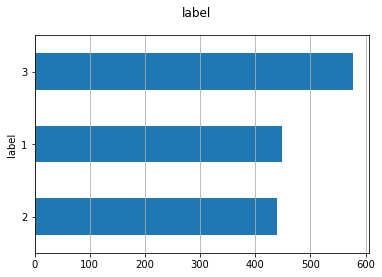

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("label", fontsize=12)
dtf["label"].reset_index().groupby("label").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords.extend(["dear"])

In [ ]:
dtf["clean_text"] = dtf["content"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

In [ ]:
dtf

,content,label,clean_text
0,"Dear Ivy,\n\nHope you everything goes well in ...",2,ivy hope everything go well golden autumn seas...
1,View Online \n\n\n\n\n\nBetter Faster Greener\...,2,view online better faster greener better perfo...
2,Thank you for your call earlier.\n\nPlease fin...,2,thank call earlier please find attached compan...
3,Have a nice day!\nThis time we'd like to share...,2,nice day time wed like share antesky portable ...
4,"Dear Mr. Terence Chua,\nI have a new enquiry a...",3,mr terence chua new enquiry attach file would ...
...,...,...,...
1462,Here is a snapshot of what is going on right n...,1,snapshot going right unusual according iso owe...
1463,After speaking with Chris this afternoon I bel...,1,speaking chris afternoon believe status ucsf p...
1464,Good Afternoon I ran only the Mid Columbia She...,1,good afternoon ran mid columbia sheet data jun...
1465,!!!Could not find object. Disk or network erro...,1,could find object disk network error general s...


In [ ]:
## split dataset
dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3)
## get target
y_train = dtf_train["label"].values
y_test = dtf_test["label"].values

In [ ]:
## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [ ]:
corpus = dtf_train["clean_text"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

Text(0.5, 1.0, 'Sparse Matrix Sample')

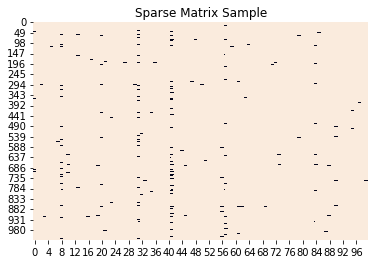

In [ ]:
sns.heatmap(X_train.todense()[:,np.random.randint(0,X_train.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [ ]:
y = dtf_train["label"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["y"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["y"]==cat]["feature"].values[:10]))
   print(" ")

# 1:
  . selected features: 36
  . top features: shoe,pair,error,pair shoe,refund,ordered,sir,website,problem,bought
 
# 2:
  . selected features: 14
  . top features: po,contract,draft,bank,pi,program,draft po,shoe,sign,student
 
# 3:
  . selected features: 13
  . top features: quote,price,shoe,quotation,send quote,vat,offer,pc,pair,file
 


In [ ]:
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [ ]:
classifier = svm.SVC(C=1.0, kernel='linear', degree=15, gamma='auto', probability=True)

In [ ]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = dtf_test["clean_text"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

Accuracy: 0.69
Auc: 0.85
Detail:
              precision    recall  f1-score   support

           1       0.81      0.59      0.68       134
           2       0.72      0.52      0.61       136
           3       0.63      0.91      0.75       171

    accuracy                           0.69       441
   macro avg       0.72      0.67      0.68       441
weighted avg       0.72      0.69      0.69       441



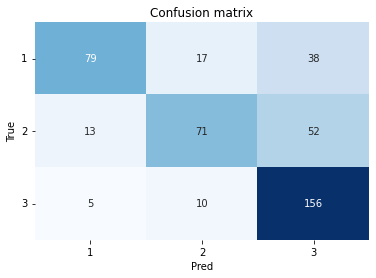

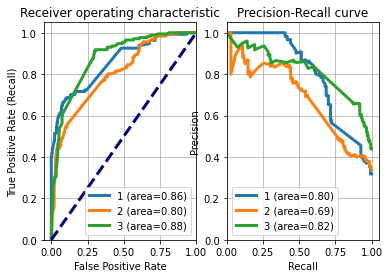

In [ ]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

In [ ]:
## select observation
i = 0
txt_instance = dtf_test["content"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))
## show explanation
explainer = lime_text.LimeTextExplainer(class_names=
             np.unique(y_train))
explained = explainer.explain_instance(txt_instance, 
             model.predict_proba, num_features=3)
explained.show_in_notebook(text=txt_instance, predict_proba=False)

True: 2 --> Pred: 2 | Prob: 0.87


***Word2Vec***

In [ ]:
nlp = gensim_api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
corpus = dtf_train["clean_text"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)

## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ".encode(), min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ".encode(), min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

In [ ]:
## fit w2v
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300,   
            window=8, min_count=1, sg=1, iter=30)

<ipython-input-88-a834b89cab0c>:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  nlp.most_similar(word, topn=20)]
<ipython-input-88-a834b89cab0c>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = nlp[tot_words]
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

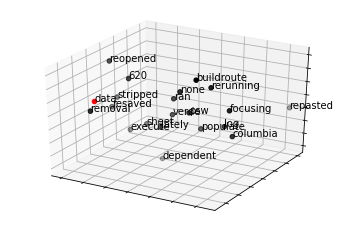

In [ ]:
word = "data"
fig = plt.figure()
## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 nlp.most_similar(word, topn=20)]
X = nlp[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [ ]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")

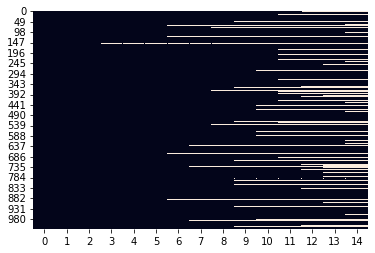

In [ ]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [ ]:
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf_train["clean_text"].iloc[i].split())
print("from: ", dtf_train["clean_text"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf_train["clean_text"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[dtf_train["clean_text"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  thank enquiry please find attached quotation reference ctp brand stand costex tractor part g stand genuine cat would like take opportunity introduce stockist authorised dealer ctp costex tractor part brand south east asia ctp premium market brand specializing manufacturing caterpillar spare part please find company profile attached easy reference hope receive valued order soon please advise quotation reference number place order | len: 61
to:  [   5  148    2   63   16   25  159 1882  149 2369 2370 2371   49 1133
 2369] | len: 15
check:  thank  -- idx in vocabulary --> 5
vocabulary:  {'NaN': 1, 'please': 2, 'order': 3, 'shoe': 4, 'thank': 5} ... (padding element, 0)


In [ ]:
corpus = dtf_test["clean_text"]

## create list of n-grams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
    
## detect common bigrams and trigrams using the fitted detectors
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
## text to sequence with the fitted tokenizer
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)

## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=15,
             padding="post", truncating="post")

In [ ]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, 300))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

<ipython-input-93-9112dbec5449>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embeddings[idx] =  nlp[word]


In [ ]:
word = "data"
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, 
      "|vector")

dic[word]: 247 |idx
embeddings[idx]: (300,) |vector


In [ ]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs)
    x = layers.Dense(neurons, activation="softmax")(x)
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x])
    return x

## input
x_in = layers.Input(shape=(15,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)
## apply attention
x = attention_layer(x, neurons=15)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                         return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x)
y_out = layers.Dense(3, activation='softmax')(x)
## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 15, 300)      1881900     ['input_1[0][0]']                
                                                                                                  
 permute (Permute)              (None, 300, 15)      0           ['embedding[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 300, 15)      240         ['permute[0][0]']                
                                                                                              

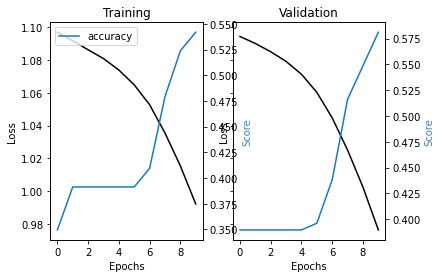

In [ ]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])
## train
training = model.fit(x=X_train, y=y_train, batch_size=256, 
                     epochs=10, shuffle=True, verbose=0, 
                     validation_split=0.3)
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [ ]:
## test
predicted_prob = model.predict(X_test)
predicted = [dic_y_mapping[np.argmax(pred)] for pred in 
             predicted_prob]

14/14 [==============================] - 2s 10ms/step


In [ ]:
## select observation
i = 0
txt_instance = dtf_test["content"].iloc[i]
## check true value and predicted value
print("True:", y_test[i], "--> Pred:", predicted[i], "| Prob:", round(np.max(predicted_prob[i]),2))

## show explanation
### 1. preprocess input
lst_corpus = []
for string in [re.sub(r'[^\w\s]','', txt_instance.lower().strip())]:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus.append(lst_grams)
lst_corpus = list(bigrams_detector[lst_corpus])
lst_corpus = list(trigrams_detector[lst_corpus])
X_instance = kprocessing.sequence.pad_sequences(
              tokenizer.texts_to_sequences(corpus), maxlen=15, 
              padding="post", truncating="post")
### 2. get attention weights
layer = [layer for layer in model.layers if "attention" in 
         layer.name][0]
func = K.function([model.input], [layer.output])
weights = func(X_instance)[0]
weights = np.mean(weights, axis=2).flatten()

True: 2 --> Pred: 3 | Prob: 0.44
